In [0]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
from sklearn import datasets

n_pts= 500
X, y =  datasets.make_circles(n_samples=n_pts, random_state=123, noise=0.1, factor=0.2)
X_data = torch.Tensor(X)
y_data = torch.Tensor(y.reshape(500,1))

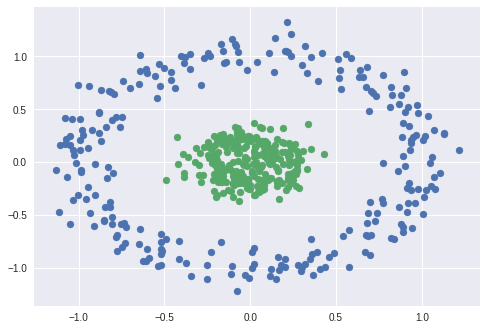

In [0]:
def scatter_plot():
  plt.scatter(X[y==0, 0], X[y==0, 1])
  plt.scatter(X[y==1, 0], X[y==1, 1])
  
scatter_plot()

In [0]:
class Model(nn.Module):
  def __init__(self, input_size, H1, output_size):
    super().__init__()
    self.linear = nn.Linear(input_size, H1)
    self.linear2 = nn.Linear(H1, output_size)
    
  def forward(self, x):
    x = torch.sigmoid(self.linear(x))
    x = torch.sigmoid(self.linear2(x))
    return x
  
  def predict(self, x):
    pred = self.forward(x)
    if pred >= 0.5:
      return 1
    else:
      return 0

In [0]:
torch.manual_seed(2)
model = Model(2, 4, 1)
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.1622, -0.1683],
        [ 0.1939, -0.0361],
        [ 0.3021,  0.1683],
        [-0.0813, -0.5717]], requires_grad=True), Parameter containing:
tensor([ 0.1614, -0.6260,  0.0929,  0.0470], requires_grad=True), Parameter containing:
tensor([[-0.1099,  0.4088,  0.0334,  0.2073]], requires_grad=True), Parameter containing:
tensor([0.2116], requires_grad=True)]


In [0]:
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

In [0]:
epochs = 400
losses = []
for i in range(epochs):
  y_pred = model.forward(X_data)
  loss = criterion(y_pred, y_data)
  print("epoch:", i, "loss", loss.item())
  losses.append(loss.item())
  
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

epoch: 0 loss 0.7148522138595581
epoch: 1 loss 0.6947312355041504
epoch: 2 loss 0.6955161094665527
epoch: 3 loss 0.7014897465705872
epoch: 4 loss 0.7013992667198181
epoch: 5 loss 0.697472095489502
epoch: 6 loss 0.6939275860786438
epoch: 7 loss 0.6928625106811523
epoch: 8 loss 0.693941593170166
epoch: 9 loss 0.6954426765441895
epoch: 10 loss 0.6958808302879333
epoch: 11 loss 0.6949241757392883
epoch: 12 loss 0.693157970905304
epoch: 13 loss 0.6914014220237732
epoch: 14 loss 0.6901755332946777
epoch: 15 loss 0.6894776225090027
epoch: 16 loss 0.6888664364814758
epoch: 17 loss 0.6877952814102173
epoch: 18 loss 0.6859349608421326
epoch: 19 loss 0.6832882165908813
epoch: 20 loss 0.6800878047943115
epoch: 21 loss 0.6766111850738525
epoch: 22 loss 0.6730255484580994
epoch: 23 loss 0.6693331003189087
epoch: 24 loss 0.6653968095779419
epoch: 25 loss 0.661038875579834
epoch: 26 loss 0.6561349034309387
epoch: 27 loss 0.6506633758544922
epoch: 28 loss 0.6446858048439026
epoch: 29 loss 0.63828414678

Text(0.5, 0, 'epoch')

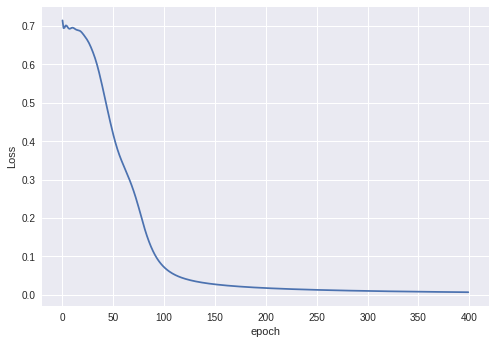

In [0]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch')

In [0]:
def plot_decision_boundary(X,y):
  x_span = np.linspace(min(X[:, 0]) -0.25, max(X[:, 0])+0.25)
  y_span = np.linspace(min(X[:, 1]) -0.25, max(X[:,1])+0.25)
  xx, yy = np.meshgrid(x_span, y_span)
  grid = torch.Tensor(np.c_[xx.ravel(), yy.ravel()])
  pred_func = model.forward(grid)
  z = pred_func.view(xx.shape).detach().numpy()
  plt.contourf(xx, yy, z)

[-1.13339265 -1.08546    -1.03752735 -0.98959471 -0.94166206 -0.89372941
 -0.84579676 -0.79786411 -0.74993147 -0.70199882 -0.65406617 -0.60613352
 -0.55820088 -0.51026823 -0.46233558 -0.41440293 -0.36647028 -0.31853764
 -0.27060499 -0.22267234 -0.17473969 -0.12680704 -0.0788744  -0.03094175
  0.0169909   0.06492355  0.11285619  0.16078884  0.20872149  0.25665414
  0.30458679  0.35251943  0.40045208  0.44838473  0.49631738  0.54425002
  0.59218267  0.64011532  0.68804797  0.73598062  0.78391326  0.83184591
  0.87977856  0.92771121  0.97564386  1.0235765   1.07150915  1.1194418
  1.16737445  1.21530709]


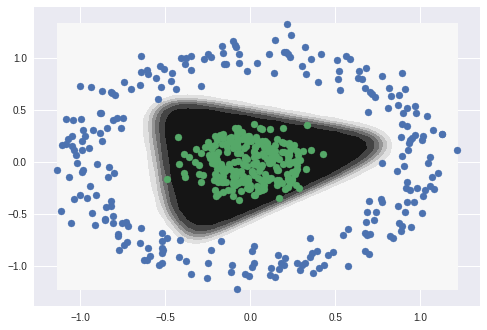

In [0]:
plot_decision_boundary(X,y)
scatter_plot()

Prediction is 1
[-1.38339265 -1.32525592 -1.26711919 -1.20898246 -1.15084573 -1.092709
 -1.03457227 -0.97643554 -0.91829881 -0.86016208 -0.80202536 -0.74388863
 -0.6857519  -0.62761517 -0.56947844 -0.51134171 -0.45320498 -0.39506825
 -0.33693152 -0.27879479 -0.22065806 -0.16252133 -0.1043846  -0.04624787
  0.01188886  0.07002559  0.12816232  0.18629905  0.24443578  0.30257251
  0.36070923  0.41884596  0.47698269  0.53511942  0.59325615  0.65139288
  0.70952961  0.76766634  0.82580307  0.8839398   0.94207653  1.00021326
  1.05834999  1.11648672  1.17462345  1.23276018  1.29089691  1.34903364
  1.40717037  1.46530709]


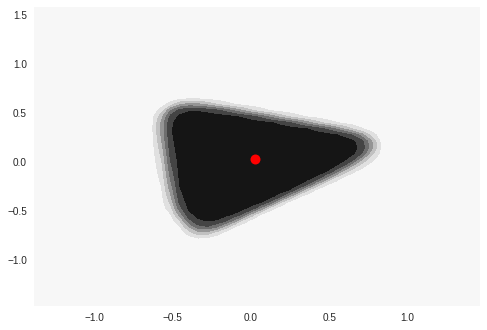

In [0]:
x = 0.025
y = 0.025
point  = torch.Tensor([x, y])
prediction = model.predict(point)
plt.plot([x], [y], marker='o', markersize=10, color='red')
print("Prediction is", prediction)
plot_decision_boundary(X,y)